<a href="https://colab.research.google.com/github/xenonthesigma/bml/blob/main/bml_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


{'winequality-red.csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3.16;0.88;9.2;5\n8.9;0.62;0.19;3.9;0.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [4]:
red_wine = pd.read_csv('winequality-red.csv', delimiter = ';')
red_wine['type']='red'
white_wine = pd.read_csv('winequality-white.csv', delimiter = ';')
white_wine['type']='white'
dfs = [red_wine, white_wine]
merged = pd.concat(dfs)
merged.dropna()

merged.describe()
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [5]:
#preprocess the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler

labelencoder = LabelEncoder()
merged['type_encoded'] = labelencoder.fit_transform(merged['type'])
merged = merged.drop('type',axis = 1)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_encoded          6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [6]:
#train test split
from sklearn.model_selection import train_test_split
X = merged.drop('type_encoded', axis=1)
y = merged['type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

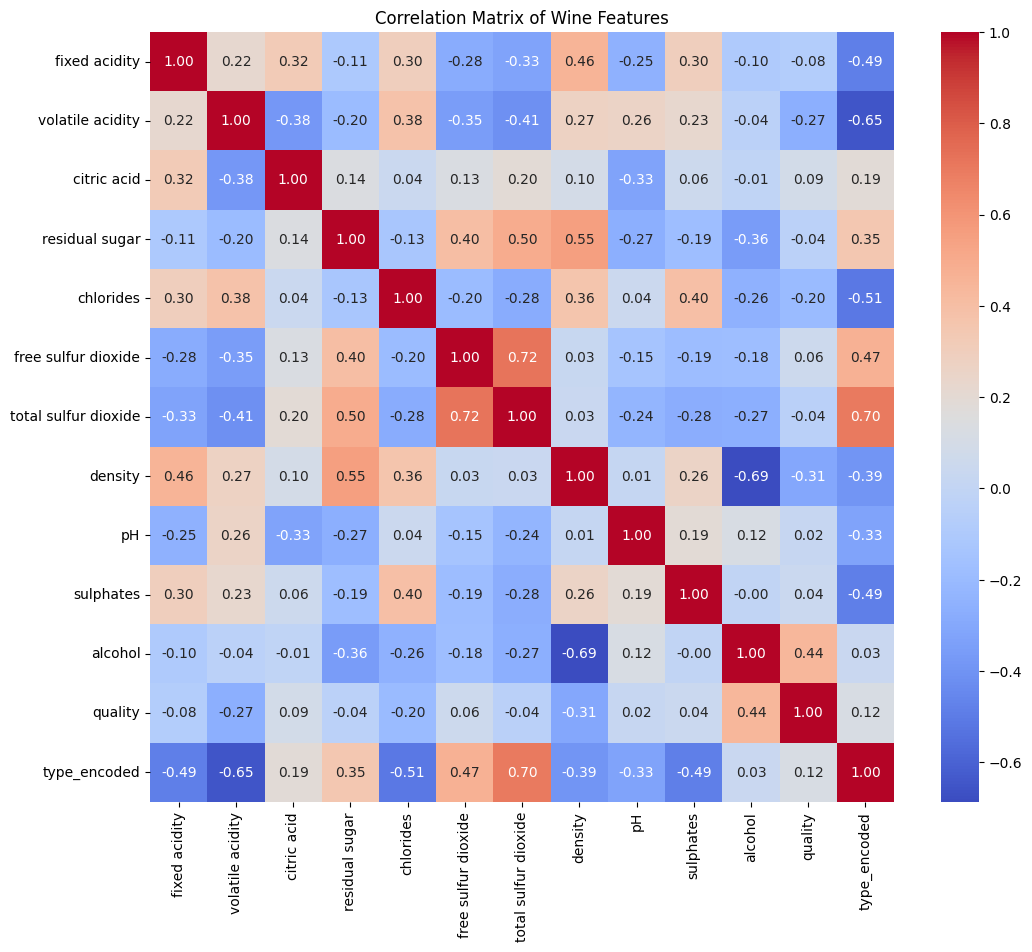

In [7]:
# Calculate the correlation matrix
import seaborn as sns
correlation_matrix = merged.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

#logistic regression model
# Increase max_iter to allow more iterations
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500, solver='lbfgs')  # Increase iterations

#train the model
model.fit(X_train, y_train)
y_trained = model.predict(X_train)
y_predicted = model.predict(X_test)

#calculate and print accuracy scores
train_accuracy = accuracy_score(y_train, y_trained)
test_accuracy = accuracy_score(y_test, y_predicted)

print("Logistic Training Accuracy:", train_accuracy)
print("Logistic Model Accuracy:", test_accuracy)


Logistic Training Accuracy: 0.9859534346738503
Logistic Model Accuracy: 0.9792307692307692


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
#gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

#train the model
model.fit(X_train, y_train)
y_trained = model.predict(X_train)
y_predicted = model.predict(X_test)

#calculate and print accuracy scores
train_accuracy = accuracy_score(y_train, y_trained)
test_accuracy = accuracy_score(y_test, y_predicted)

print("Logistic Training Accuracy:", train_accuracy)
print("Logistic Model Accuracy:", test_accuracy)



Logistic Training Accuracy: 0.9719068693477005
Logistic Model Accuracy: 0.9684615384615385


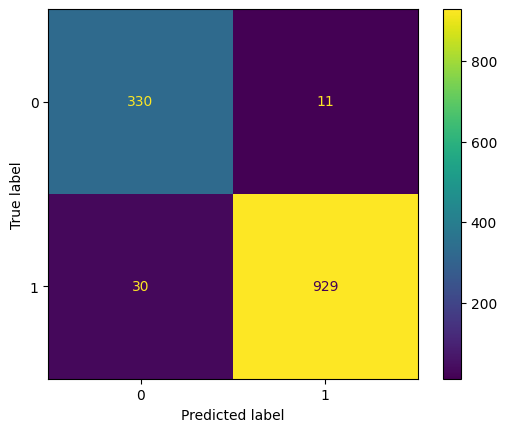

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predicted)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# Assuming 'model' is your trained classifier
disp.plot()
plt.show()

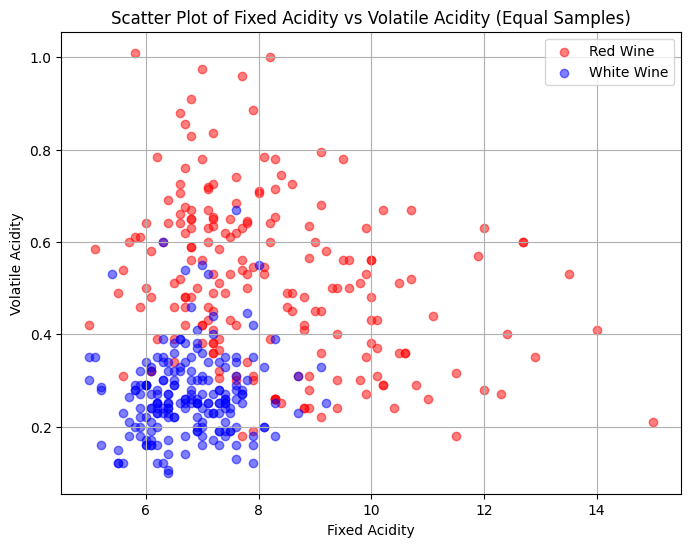

In [11]:
n_samples = 200  # Number of samples to take from each wine type

# Take random samples from each DataFrame
sample_red_wine = red_wine.sample(n=n_samples, random_state=42)
sample_white_wine = white_wine.sample(n=n_samples, random_state=42)

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(sample_red_wine['fixed acidity'], sample_red_wine['volatile acidity'],
            color='red', label='Red Wine', alpha=0.5)
plt.scatter(sample_white_wine['fixed acidity'], sample_white_wine['volatile acidity'],
            color='blue', label='White Wine', alpha=0.5)
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Scatter Plot of Fixed Acidity vs Volatile Acidity (Equal Samples)')
plt.legend()  # Add a legend to distinguish wine types
plt.grid(True)  # Add a grid for better visualization
plt.show()

In [19]:
#min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled

#train test split on scaled features
X_Train, X_Test, y_Train, y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=42)

# **Experiment 7: KNN**

**KNN**

steps for manual model

1. calculate the euclidean distance for all data points
2. sort the distances
3. calculate the k-nearest neighbours
4. perform majority voting for classification, or average for regression

In [32]:
from collections import Counter

y_Train = np.array(y_Train)
y_Test = np.array(y_Test)
X_Train = np.array(X_Train)
X_Test = np.array(X_Test)

# Calculate the Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]  # Compute distances
        k_indices = np.argsort(distances)[:k]  # Get k nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]  # Get labels
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]  # Majority vote
        predictions.append(most_common)
    return np.array(predictions)

y_pred = knn_predict(X_Train, y_Train, X_Test, k=5)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [33]:
from sklearn.neighbors import KNeighborsClassifier
X = merged.drop('type_encoded', axis=1)
y = merged['type_encoded']
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_trained = knn.predict(X_train)
y_predicted = knn.predict(X_test)
knn_accuracy = round(accuracy_score(y_test, y_predicted))
print(knn_accuracy)

1
